In [278]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
%matplotlib inline

### 1. Read in and inspect the data

In [279]:
#Read in the data
data = pd.ExcelFile("Data/Healthcare_dataset.xlsx")
data.sheet_names

['Feature Description', 'Dataset']

In [280]:
#Parse the dataset from data
df = data.parse(sheet_name="Dataset")

In [281]:
#See the head
df.head()

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,P1,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
1,P2,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
2,P3,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,Y,N,N,N,N,N,N,N,2
3,P4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1
4,P5,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1


In [282]:
#See the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424 entries, 0 to 3423
Data columns (total 69 columns):
 #   Column                                                              Non-Null Count  Dtype 
---  ------                                                              --------------  ----- 
 0   Ptid                                                                3424 non-null   object
 1   Persistency_Flag                                                    3424 non-null   object
 2   Gender                                                              3424 non-null   object
 3   Race                                                                3424 non-null   object
 4   Ethnicity                                                           3424 non-null   object
 5   Region                                                              3424 non-null   object
 6   Age_Bucket                                                          3424 non-null   object
 7   Ntm_Speciality          

In [283]:
#Parse the feature descriptions from the excel file
feature_description = data.parse("Feature Description",index_col=[0,1])
feature_description

Variable Description
Bucket                   Variable                                                                              
Unique Row Id            Patient ID                                                   Unique ID of each patient
Target Variable          Persistency_Flag                     Flag indicating if a patient was persistent or...
Demographics             Age                                            Age of the patient during their therapy
                         Race                                        Race of the patient from the patient table
                         Region                                    Region of the patient from the patient table
                         Ethnicity                              Ethnicity of the patient from the patient table
                         Gender                                    Gender of the patient from the patient table
                         IDN Indicator                                   Flag indicating patients mapped to IDN
Provider Attributes      NTM - Physician Specialty              Specialty of the HCP that prescribed the NTM Rx
Clinical Factors         NTM - T-Score                        T Score of the patient at the time of the NTM ...
                         Change in T Score                    Change in Tscore before starting with any ther...
                         NTM - Risk Segment                   Risk Segment of the patient at the time of the...
                         Change in Risk Segment               Change in Risk Segment before starting with an...
                         NTM - Multiple Risk Factors          Flag indicating if  patient falls under multip...
                         NTM - Dexa Scan Frequency            Number of DEXA scans taken prior to the first ...
                         NTM - Dexa Scan Recency              Flag indicating the presence of Dexa Scan befo...
                         Dexa During Therapy                  Flag indicating if the patient had a Dexa Scan...
                         NTM - Fragility Fracture Recency     Flag indicating if the patient had a recent fr...
                         Fragility Fracture During Therapy    Flag indicating if the patient had fragility f...
                         NTM - Glucocorticoid Recency         Flag indicating usage of Glucocorticoids (>=7....
                         Glucocorticoid Usage During Therapy  Flag indicating if the patient had a Glucocort...
Disease/Treatment Factor NTM - Injectable Experience          Flag indicating any injectable drug usage in t...
                         NTM - Risk Factors                   Risk Factors that the patient is falling into....
                         NTM - Comorbidity                    Comorbidities are divided into two main catego...
                         NTM - Concomitancy                   Concomitant drugs recorded prior to starting w...
                         Adherence                                                  Adherence for the therapies

### 2. Check for missing values

In [284]:
#Check for null values
df.isna().sum()

Ptid                              0
Persistency_Flag                  0
Gender                            0
Race                              0
Ethnicity                         0
                                 ..
Risk_Hysterectomy_Oophorectomy    0
Risk_Estrogen_Deficiency          0
Risk_Immobilization               0
Risk_Recurring_Falls              0
Count_Of_Risks                    0
Length: 69, dtype: int64

In [285]:
df.isna().sum().max()
#There are no missing values

0

### 3. Check for outliers

In [286]:
#Define the function that calculates upper and lower bounds for outliers based on IQR
def get_outliers(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    
    iqr = q3-q1
    
    ub = q1-1.5*iqr
    lb = q3+1.5*iqr
    
    return series[(series<ub) | (series>lb)]

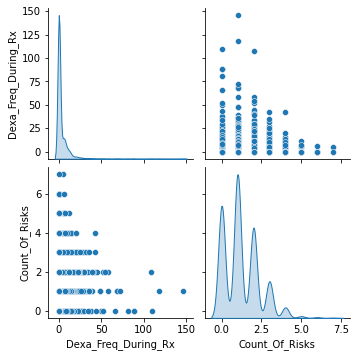

In [287]:
#See the pairplot
sns.pairplot(df,diag_kind="kde");

#### 3.1. The "Dexa_Freq_During_Rx" column

Text(0.5, 0, 'Dexa_Freq_During_Rx_Log')

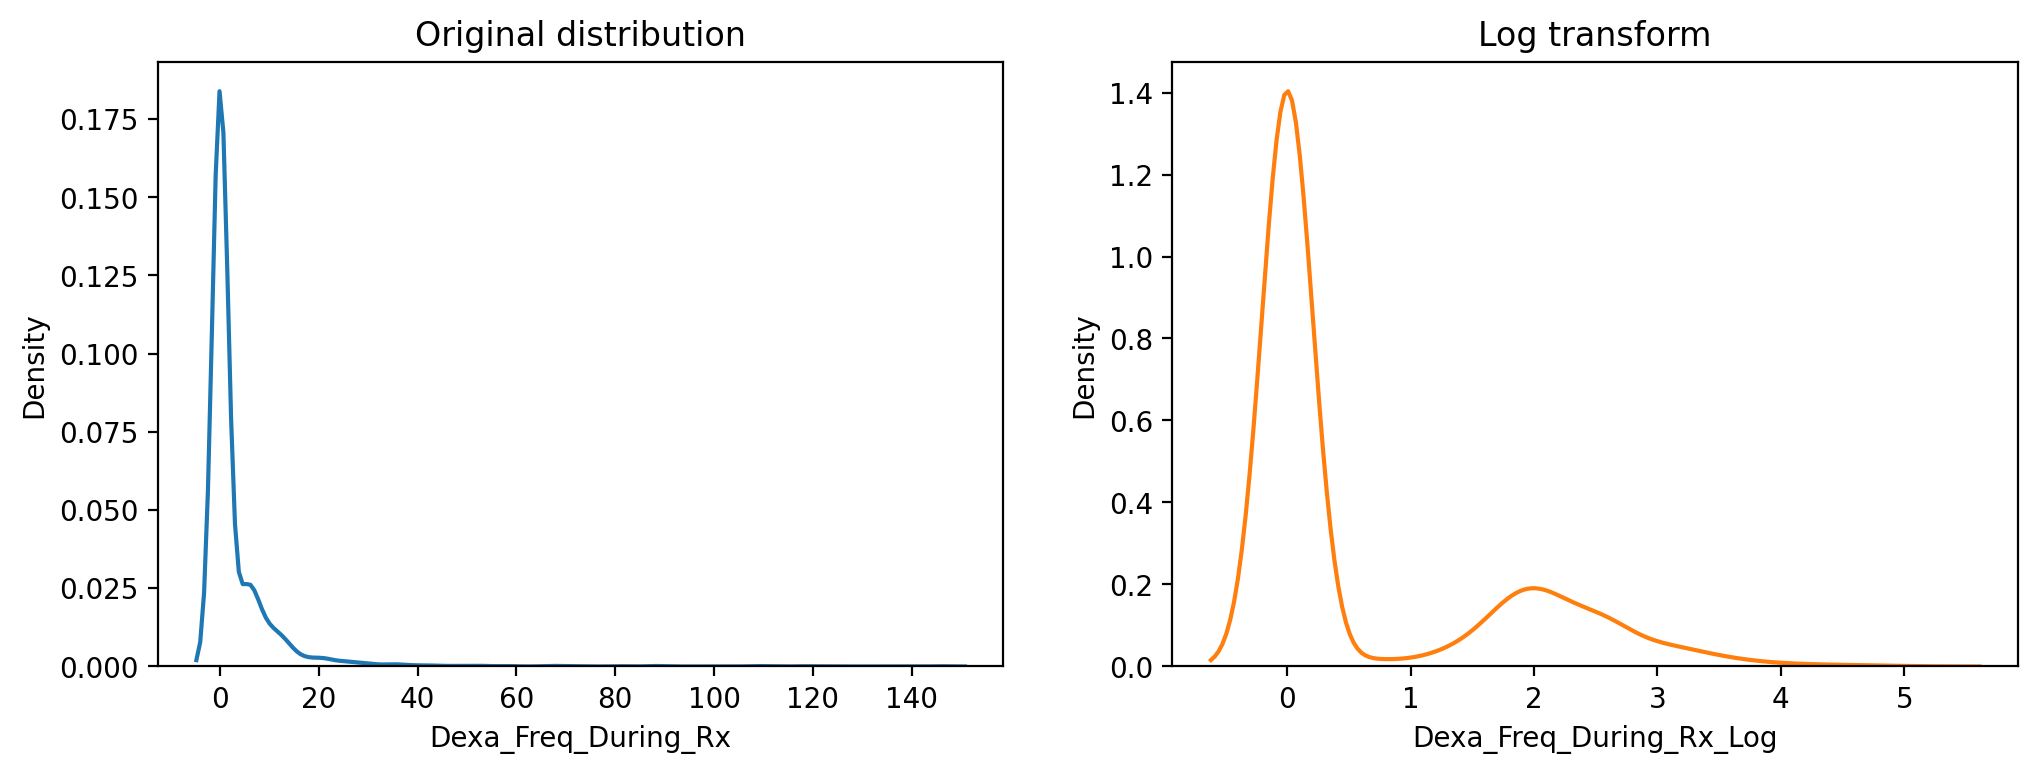

In [288]:
#Compare the original distribution and the log transform of "Dexa_Freq_During_Rx"
fig,axes=plt.subplots(nrows=1,ncols=2)
fig.set_size_inches((12,4))
fig.set_dpi(200)
sns.kdeplot(x=df["Dexa_Freq_During_Rx"],ax=axes[0],color="tab:blue")
sns.kdeplot(x=np.log(df["Dexa_Freq_During_Rx"]+1),ax=axes[1],color="tab:orange");
axes[0].set_title("Original distribution")
axes[1].set_title("Log transform");
axes[1].set_xlabel("Dexa_Freq_During_Rx_Log")

In [289]:
#Skewness of the original distribution
skew(df['Dexa_Freq_During_Rx'])

6.805747051718919

Notice that the probability density over the column "Dexa_Freq_During_Rx" is exponential-like fat tailed distribution. Also, this distribution has large positive skewness. Therefore, it is suitable to apply the log transform to this column. Notice that the mininum value in this column is zero so to avoid the divergence problems we will apply the transformation log(x+1). The two distributions are compared side by side in the figure above.

In [290]:
#Apply the log transform
df["Dexa_Freq_During_Rx_Log"] = df['Dexa_Freq_During_Rx'].apply(lambda x: np.log(1+x))

In [291]:
#Drop the original column
df=df.drop("Dexa_Freq_During_Rx",axis=1)

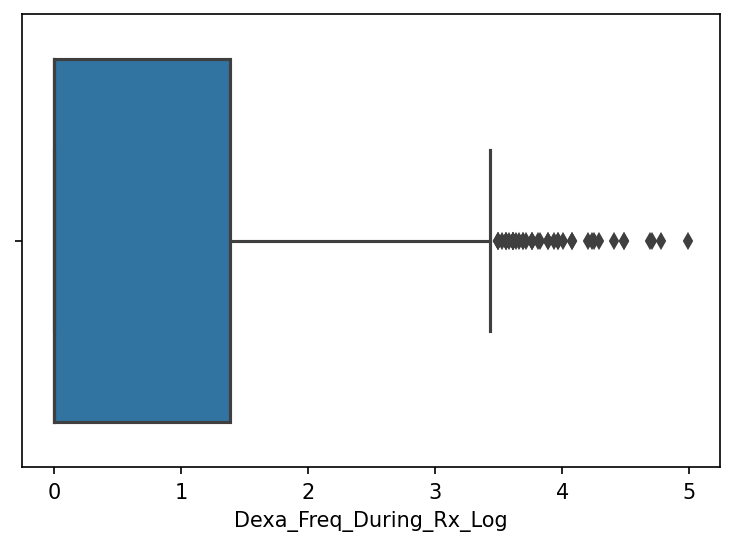

In [292]:
#We check for outliers using the boxplot
plt.figure(figsize=(6,4),dpi=150)
sns.boxplot(x=df["Dexa_Freq_During_Rx_Log"]);

In [293]:
get_outliers(df["Dexa_Freq_During_Rx_Log"])

241     3.637586
541     4.406719
651     3.761200
1370    3.761200
1398    3.828641
1734    4.077537
1838    3.526361
1854    4.077537
1901    4.709530
1909    3.610918
1920    3.555348
1993    4.488636
2013    4.204693
2024    3.496508
2028    4.488636
2033    4.779123
2044    3.891820
2065    3.610918
2132    4.248495
2134    3.663562
2151    3.713572
2168    3.496508
2176    4.234107
2197    3.970292
2205    3.931826
2215    4.990433
2275    3.555348
2278    3.970292
2298    3.891820
2314    3.806662
2379    3.496508
2393    3.761200
2503    3.583519
2557    3.688879
2558    3.610918
2603    4.691348
2608    3.610918
2681    4.007333
2686    3.688879
2713    3.555348
2751    4.290459
2799    3.610918
Name: Dexa_Freq_During_Rx_Log, dtype: float64

In [294]:
#Calculate what percentage of the data are classified as outliers in this column
print(f'{(len(get_outliers(df["Dexa_Freq_During_Rx_Log"]))/len(df))*100} %')

1.2266355140186915 %


This is a small percentage of the data so we can drop these rows.

In [295]:
df = df.drop(index = get_outliers(df["Dexa_Freq_During_Rx_Log"]).index)

#### 3.2. The "Count_Of_Risks" column

In [296]:
skew(df["Count_Of_Risks"])

0.880823577409654

The distribution has a positive skewness.

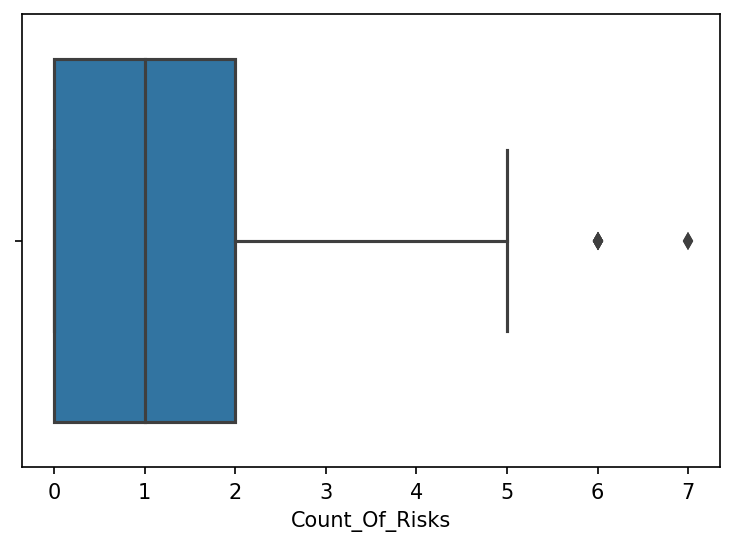

In [159]:
#We check for outliers using the boxplot
plt.figure(figsize=(6,4),dpi=150)
sns.boxplot(x=df["Count_Of_Risks"]);

Only two points are classified as outliers so we can drop them.

In [297]:
df = df.drop(index = get_outliers(df["Count_Of_Risks"]).index)

#### 3.3. Check the pairplot once again

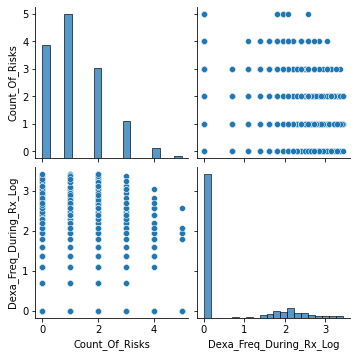

In [163]:
sns.pairplot(df);

### 4. Categorical colums

Let's check for imbalances in the categorical columns

Categorical columns can be highly imbalanced. If we take a cutoff at about 0.3% of the lenght of the df we can classify as outliers any categories that have 10 or less datapoints contained in them. If the column with outliers is binary we will drop both the column and the datapoints and if the column has more than two categories we will drop only the datapoints. 

In [216]:
#Create a list of categorical columns
cat_cols=df.select_dtypes("object").drop("Ptid",axis=1).columns
#Create a list of categorical columns with outliers
cat_cols_outliers = cat_cols[[any(df[col].value_counts()<=10) for col in cat_cols]] 

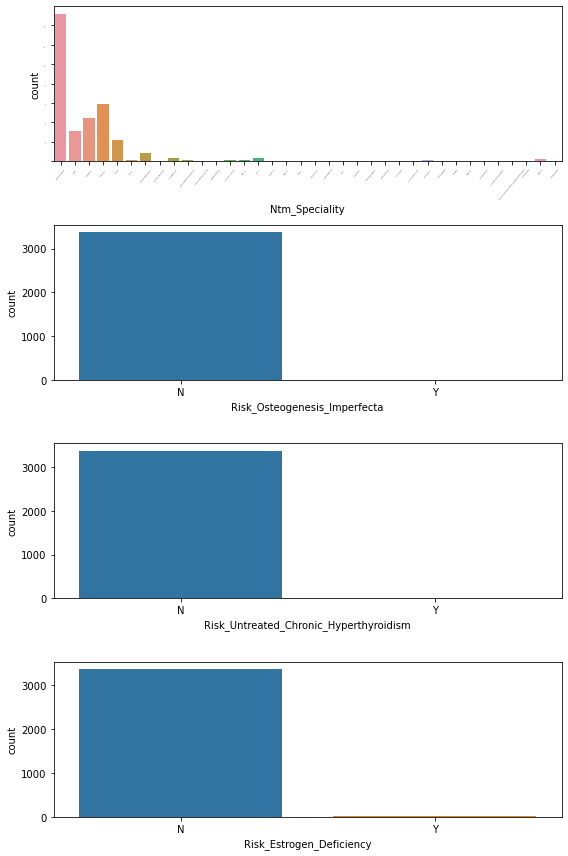

In [305]:
#Visualize the imbalance of categorical columns with outliers
fig,axes=plt.subplots(nrows=len(cat_cols_outliers)6
fig.set_size_inches((8,4*3))
i=0
for col in cat_cols_outliers:
    sns.countplot(x=df[col],ax=axes[i])
    i+=1
axes[0].tick_params(rotation=50,labelsize=0)
plt.tight_layout()

In [300]:
#Define the function that will get us the outliers
def get_outliers_cat(series,threshold):
    val_counts=series.value_counts()
    outlier_cat = val_counts[val_counts<=threshold].index
    
    if len(outlier_cat)>0:
        return pd.concat([series[series==cat] for cat in outlier_cat])
    else:
        return pd.Series([],dtype="object")

In [301]:
get_outliers_cat(df["Risk_Estrogen_Deficiency"],10)

242     Y
249     Y
754     Y
1220    Y
1660    Y
1669    Y
1720    Y
1727    Y
2047    Y
2956    Y
Name: Risk_Estrogen_Deficiency, dtype: object

In [302]:
#Create the drop index
drop_ind = pd.concat([get_outliers_cat(df[col],10) for col in cat_cols_outliers]).index.unique()

In [303]:
len(drop_ind)

60

In [306]:
#Drop the datapoints
df = df.drop(index=drop_ind)

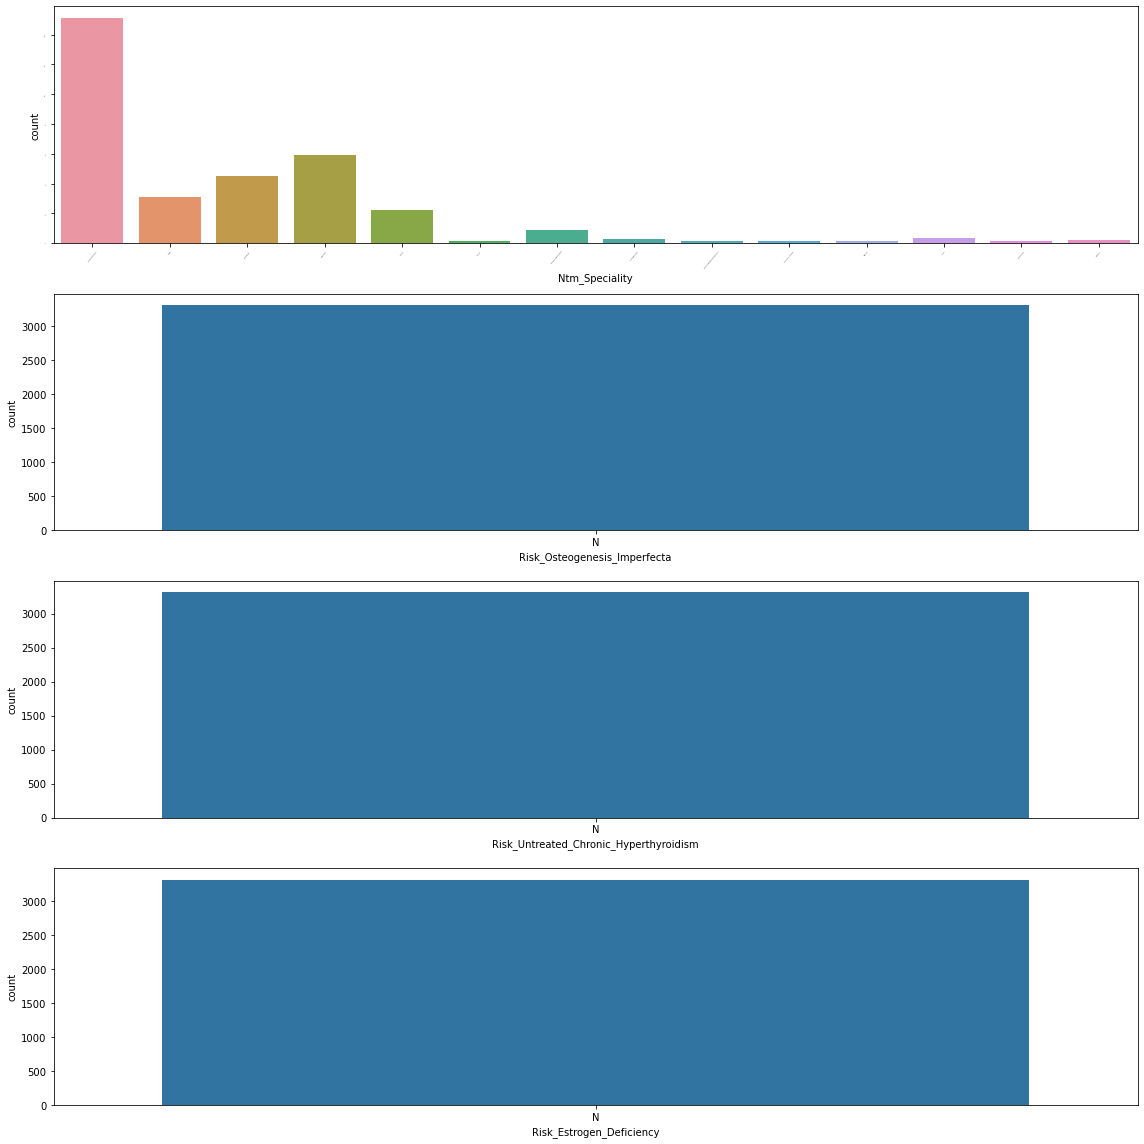

In [307]:
#Visualize the imbalance of categorical columns that previously contained the outliers
fig,axes=plt.subplots(nrows=len(cat_cols_outliers))
fig.set_size_inches((16,4*4))
i=0
for col in cat_cols_outliers:
    sns.countplot(x=df[col],ax=axes[i])
    i+=1
axes[0].tick_params(rotation=50,labelsize=0)
plt.tight_layout()

In [308]:
#Drop the colums with only one category left
df = df.drop(columns=cat_cols_outliers.difference(["Ntm_Speciality"]))

In [309]:
((3424-len(df))/3424)*100

3.212616822429906

We have dropped a little bit more than 3% of the data in the process.

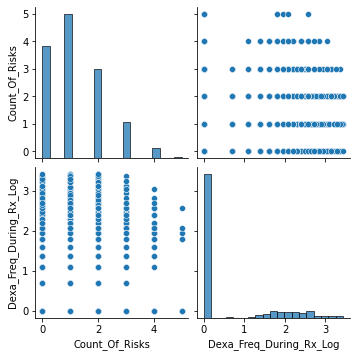

In [310]:
sns.pairplot(df)

In [311]:
len(df)

3314

In [313]:
3424-len(df)

110